In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

In [2]:
#Providing the training and test data set directory
train_dir =r'dataset\training_set'
test_dir = r'dataset\test_set'

In [3]:
# Image preprocessing 
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)

In [4]:
# Let's print the  number of class available in training data
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")

Found 156 images belonging to 2 classes.


In [5]:
# Let's print the  number of class available in testing data
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")

Found 39 images belonging to 2 classes.


In [6]:
# Model initialization
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(2,kernel_regularizer=l2(0.01),activation = "linear"))
model.compile(optimizer="adam",loss="squared_hinge", metrics = ["accuracy"])

In [7]:
# Model training 
history = model.fit(x = training_set, validation_data = test_set, epochs=30)

Epoch 1/30
5/5 [==============================] - 12s 2s/step - loss: 1.0527 - accuracy: 0.4872 - val_loss: 0.9894 - val_accuracy: 0.4872
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 0.9947 - accuracy: 0.4872 - val_loss: 0.9463 - val_accuracy: 0.4615
Epoch 3/30
5/5 [==============================] - 6s 1s/step - loss: 0.9412 - accuracy: 0.5064 - val_loss: 0.8959 - val_accuracy: 0.4872
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 0.9170 - accuracy: 0.3974 - val_loss: 0.8576 - val_accuracy: 0.4872
Epoch 5/30
5/5 [==============================] - 7s 1s/step - loss: 0.8685 - accuracy: 0.4744 - val_loss: 0.8222 - val_accuracy: 0.4872
Epoch 6/30
5/5 [==============================] - 7s 1s/step - loss: 0.8235 - accuracy: 0.5256 - val_loss: 0.7338 - val_accuracy: 0.4872
Epoch 7/30
5/5 [==============================] - 7s 1s/step - loss: 0.7285 - accuracy: 0.5769 - val_loss: 0.6651 - val_accuracy: 0.5897
Epoch 8/30
5/5 [========================

In [8]:
model.save('SVM.h5') # Saving our trained mode sd SVM.h5 file

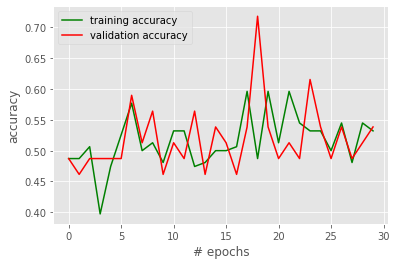

In [9]:
# Here plotting our accuracy graph of our model
from matplotlib import pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy',color='red')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig(r'SVM_acc.png')
plt.show()

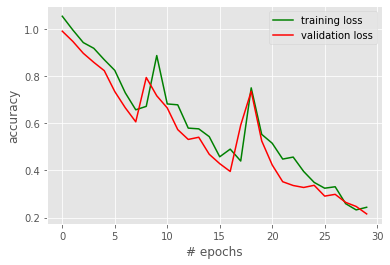

In [10]:
# Here plotting our loss graph of our model
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='training loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss',color='red')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig(r'SVM_loss.png')
plt.show()

In [11]:
# Let's print the accuracy of our model
acc=history.history['accuracy'][-1]
print(acc)

0.5320512652397156


In [12]:
# It will print each and individual category of the training data
import os
data_dir=r"dataset\training_set/"

spinal=[]
for file in os.listdir(data_dir):
    spinal+=[file]
print(spinal)
print(len(spinal))

['c', 's']
2


[0.54740083 0.6055156 ]


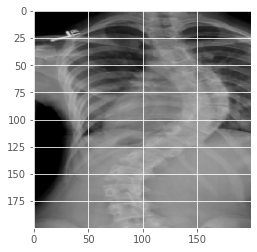

Prediction: s


In [13]:
# prediction section
import numpy as np
from skimage import io
from keras.preprocessing import image

img = image.load_img(r'dataset\training_set\s\s.8 - Copy (2).png', grayscale=False, target_size=(64,64))
show_img=image.load_img(r'dataset\training_set\s\s.8 - Copy (2).png', grayscale=False, target_size=(200, 200))
spinal = spinal
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',spinal[ind])